# Practice 1–2: Matplotlib Basics + Perception & Color

This unified practice notebook covers two lectures:

**Part A – Plotting Basics (Lecture 1)** and **Part B – Perception & Color (Lecture 2)**.

Each section contains brief explanations followed by exercises where you must **complete the code** yourself.

**General rules for this notebook:**
- Use **pure Matplotlib** (no seaborn or plotly).
- Use **one chart per figure** (no subplots in exercises unless explicitly allowed).
- For Part A, **do not set explicit colors** unless the task requires it.
- For Part B (Color), you **may and should set colormaps/palettes** when asked.

> If you see "TODO:" section or get `raise NotImplementedError`, replace it with working code.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
print('Versions — numpy:', np.__version__)


Versions — numpy: 1.26.4


# Part A — Plotting Basics (Lecture 1)

## 1. Basic line plot
Use `plt.plot(x, y)` to draw a line. Add axis labels via `plt.xlabel`, `plt.ylabel`, and titles via `plt.title`. Legends appear when you pass `label=` to plotting calls and then call `plt.legend()`.

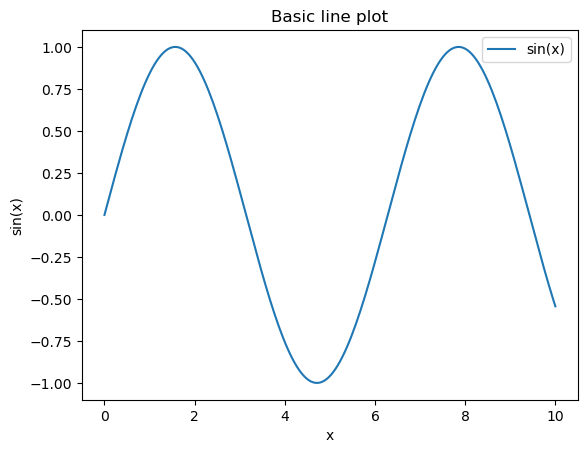

In [3]:
x = np.linspace(0, 10, 200)
y = np.sin(x)
# starts a new figure; call it before each independent chart.
plt.figure()
# draws a simple line
plt.plot(x, y, label='sin(x)')

# setup visual properties
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Basic line plot')
plt.legend()

# general function to be called to show the image
plt.show()

### Exercise 1 — Cosine line
Plot `cos(x)` over the same `x` in a **separate** figure. Add labels, a title, and a legend. **Do not set the color explicitly**.

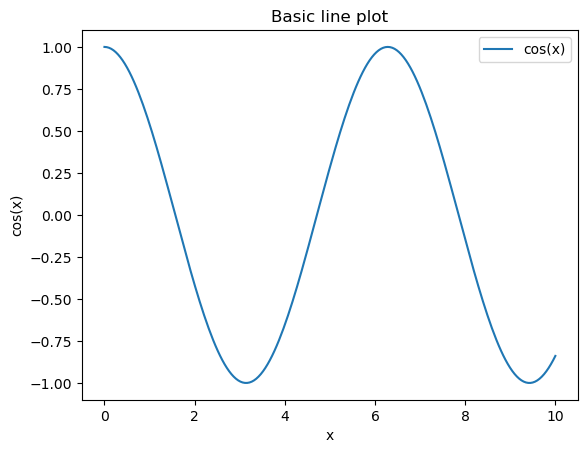

In [5]:
x = np.linspace(0, 10, 200)
y = np.cos(x)
plt.figure()
# TODO: draw the line, add labels, title, legend
plt.plot(x, y, label='cos(x)')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Basic line plot')
plt.legend()
plt.show()

## 2. Figure and Axes objects
`plt.figure()` creates a new drawing surface; `plt.gca()` gets the current axes. With axes objects you can call `set_xlabel`, `set_ylabel`, `set_title`, etc.

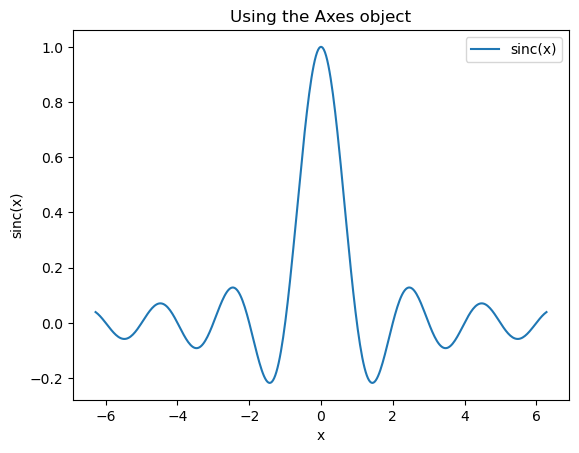

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.sinc(x)
plt.figure()
ax = plt.gca()
ax.plot(x, y, label='sinc(x)')
ax.set_xlabel('x')
ax.set_ylabel('sinc(x)')
ax.set_title('Using the Axes object')
ax.legend()
plt.show()

### Exercise 2 — Random walk via Axes
Generate a random walk as the cumulative sum of 300 steps from `{−1, +1}`. Plot it using an `Axes` object. Add axis labels and a title via the `ax.set_*` methods. No subplots.

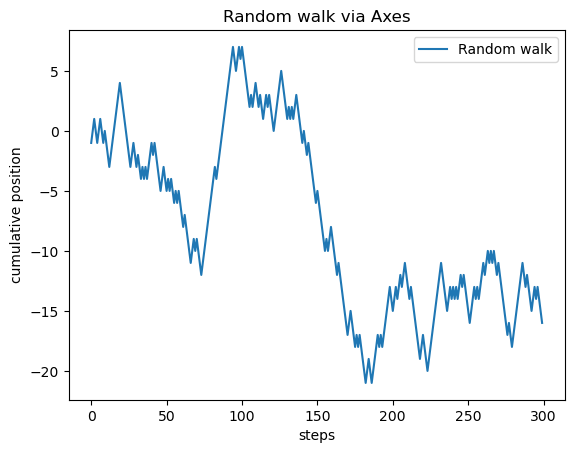

In [16]:
steps = np.random.choice([-1, 1], size=300)
walk = steps.cumsum()
plt.figure()
ax = plt.gca()
# TODO: plot the walk and add labels/title via ax methods
ax.plot(walk, label='Random walk')
ax.set_xlabel('steps')
ax.set_ylabel('cumulative position')
ax.set_title('Random walk via Axes')
ax.legend()
plt.show()

## 3. Axis limits, ticks, grid
Set limits using `plt.xlim`/`plt.ylim` (or `ax.set_xlim`/`ax.set_ylim`). Control tick locations and labels via `plt.xticks`/`plt.yticks`. Enable a grid with `plt.grid(True)`.

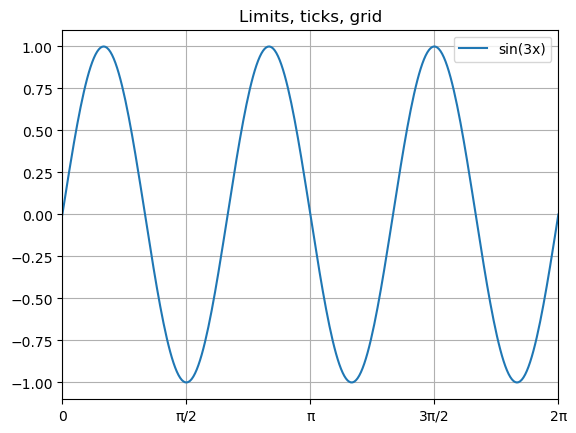

In [18]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(3*x)
plt.figure()
plt.plot(x, y, label='sin(3x)')
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], labels=['0','π/2','π','3π/2','2π'])
plt.grid(True)
plt.title('Limits, ticks, grid')
plt.legend()
plt.show()

### Exercise 3 — Damped oscillation with custom ticks
Plot `y = exp(-x) * sin(5x)` on `[0, 6π]`. Choose reasonable Y-limits, label X-ticks at `0, π, 2π, …, 6π`, and enable the grid.

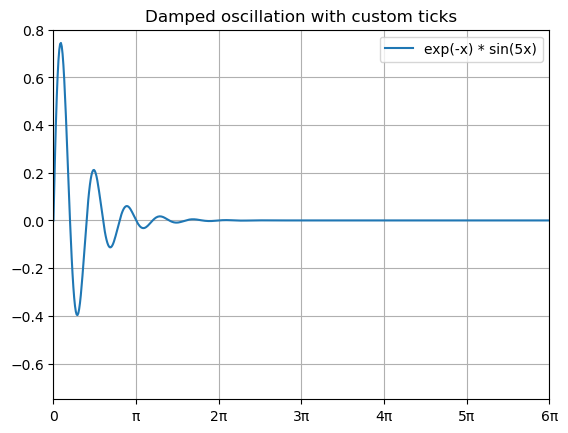

In [34]:
# TODO: generate x, compute y, plot with ticks/limits/grid
x = np.linspace(0, 6*np.pi, 600)
y = np.exp(-x)*np.sin(5*x)
plt.figure()
plt.plot(x, y, label='exp(-x) * sin(5x)')
plt.xlim(0, 6*np.pi)
plt.ylim(-0.75,0.80)
plt.xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi], labels=['0','π','2π','3π','4π','5π','6π'])
plt.grid(True)
plt.title('Damped oscillation with custom ticks')
plt.legend()
plt.show()

## 4. Markers and line styles
Add point markers with `marker=...`, and change line style via `linestyle=...`. Adjust thickness with `linewidth=`. As per rules for Part A, avoid setting explicit colors unless required.

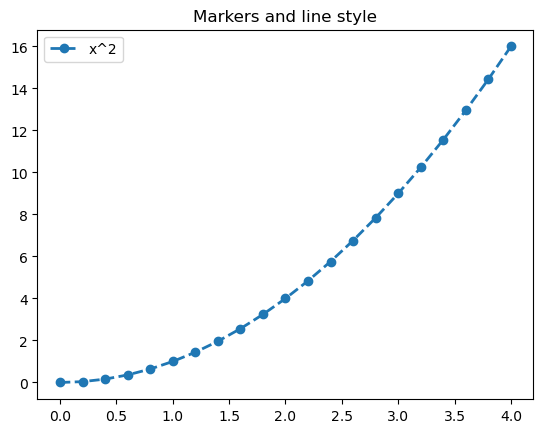

In [36]:
x = np.linspace(0, 4, 21)
y = x**2
plt.figure()
# more docs on https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
plt.plot(x, y, marker='o', linestyle='--', linewidth=2, label='x^2')
plt.title('Markers and line style')
plt.legend()
plt.show()

### Exercise 4 — Noisy scatter
Create 120 random points with `x ~ U(0,1)` and `y = x + noise`, where `noise ~ N(0, 0.05)`. Draw a **scatter-like** plot. Add a concise title.

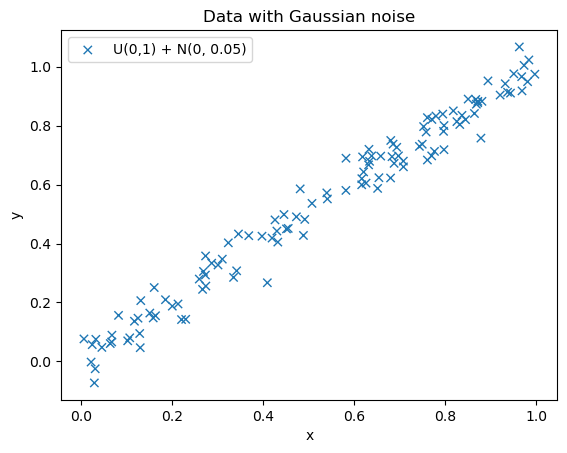

In [42]:
n = 120
x = np.random.rand(n)
noise = np.random.normal(0, 0.05, size=n)
y = x + noise
plt.figure()
# TODO: plot points only (no connecting line) with marker='x'
plt.scatter(x, y, marker='x', linestyle='', linewidth=2, label='U(0,1) + N(0, 0.05)')
plt.title('Data with Gaussian noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 5. Text and annotations
Use `plt.text(x, y, 'string')` to place text. Use `plt.annotate(...)` to draw additional info like arrows.

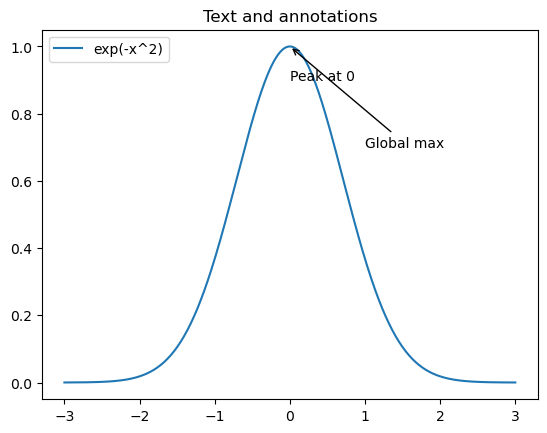

In [44]:
x = np.linspace(-3, 3, 400)
y = np.exp(-x**2)
plt.figure()
plt.plot(x, y, label='exp(-x^2)')
plt.title('Text and annotations')
plt.text(0, 0.9, 'Peak at 0')
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html
plt.annotate('Global max', xy=(0,1), xytext=(1, 0.7), arrowprops=dict(arrowstyle='->'))
plt.legend()
plt.show()

### Exercise 5 — Annotate the first peak of `sin(x)/x`
Plot `y = sin(x)/x` on `x ∈ [0.1, 10]` and annotate the **first peak to the right of 0** (near `x ≈ π`).

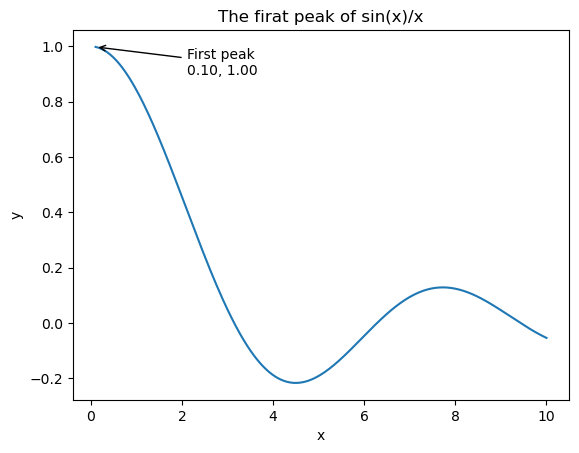

In [65]:
# TODO: plot and annotate the first peak
x = np.linspace(0.1,10,300)
y = np.sin(x)/x
peak_ind = np.argmax(y)
peak_x = x[peak_ind]
peak_y = y[peak_ind]
plt.figure()
plt.plot(x,y,label='sin(x)/x')
plt.annotate(f'First peak\n{peak_x:.2f}, {peak_y:.2f}', xy=(peak_x, peak_y), xytext=(peak_x + 2, peak_y - 0.1), arrowprops=dict(arrowstyle='->'))
plt.xlabel('x')
plt.ylabel('y')
plt.title('The firat peak of sin(x)/x')
plt.show()

## 6. Saving figures
Save the current figure with `plt.savefig(...)`. Call `plt.close()` when generating figures in batches.

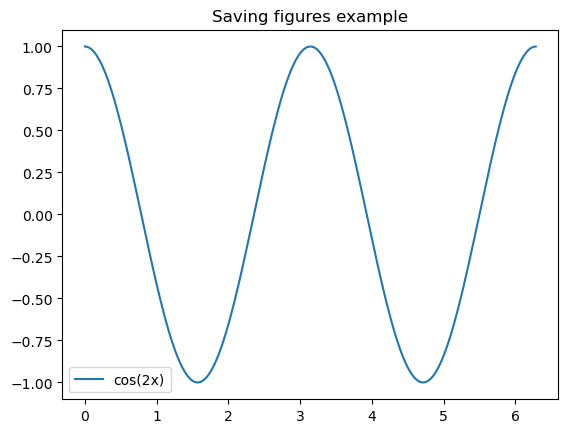

Saved to: example_partA.png


In [67]:
x = np.linspace(0, 2*np.pi, 200)
y = np.cos(2*x)
plt.figure()
plt.plot(x, y, label='cos(2x)')
plt.title('Saving figures example')
plt.legend()
out_path = 'example_partA.png'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()
print('Saved to:', out_path)

### Exercise 6 — Save your own smooth curve
Plot any **smooth** function on `[0, 5]` (for example, `sin(x) + cos(2x)`) with labels and a legend. Save to `practice12_output.png` with `dpi=200` and print the path.

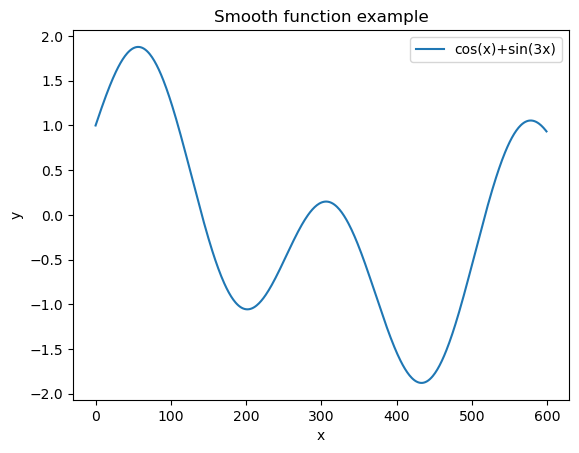

Saved to: practice12_output.png.png


In [81]:
# TODO: implement and save
x = np.linspace(0,5,600)
y = np.cos(x)+np.sin(3*x)
plt.figure()
ax = plt.gca()
ax.plot(y, label='cos(x)+sin(3x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Smooth function example')
plt.legend()
out_path = 'practice12_output.png.png'
plt.savefig(out_path, dpi=200, bbox_inches='tight')
plt.show()
print('Saved to:', out_path)

# Part B — Perception & Color (Lecture 2)

## 7. Colormap families in Matplotlib
- **Sequential** (ordered low→high): e.g., `'viridis'`, `'plasma'`, `'cividis'`.
- **Diverging** (centered around a reference like 0): e.g., `'coolwarm'`, `'PiYG'`, `'RdBu'`.
- **Cyclic** (wrap-around angles/phases): e.g., `'twilight'`.
- **Qualitative** (unordered categories): e.g., `'tab10'`, `'tab20'`.
Use `plt.cm.get_cmap(name)` and normalizations from `matplotlib.colors`.

### Example — Sequential colormap with imshow
We visualize a smooth scalar field with `imshow` and a sequential colormap (`viridis`).

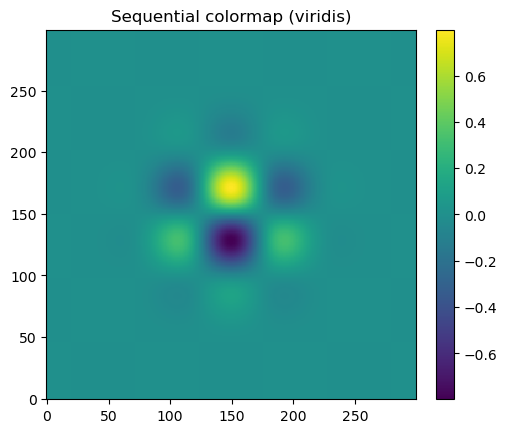

In [83]:
X = np.linspace(-3, 3, 300)
Y = np.linspace(-3, 3, 300)
XX, YY = np.meshgrid(X, Y)
Z = np.exp(-(XX**2 + YY**2)) * np.cos(3*XX) * np.sin(3*YY)
plt.figure()
im = plt.imshow(Z, origin='lower', interpolation='nearest', cmap='viridis')
plt.title('Sequential colormap (viridis)')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

### Exercise 7 — Fix a misleading colormap
Re-plot the same `Z` with a **better** sequential colormap (e.g., `'cividis'` or `'plasma'`) instead of `'jet'`. Add a colorbar and a clear title. Explain in a short comment why the chosen map is preferable.

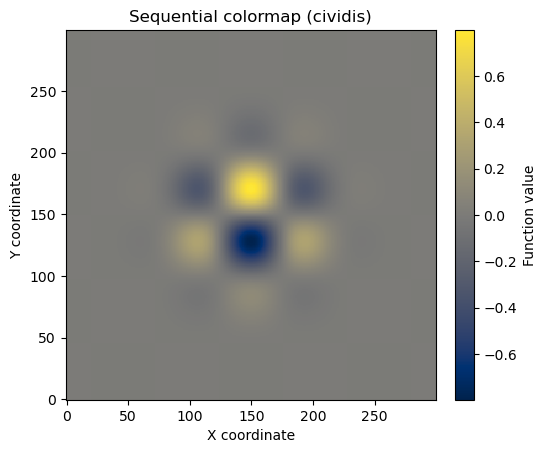

In [111]:
# TODO: choose a perceptually uniform sequential colormap and explain your choice in a comment
plt.figure()
im = plt.imshow(Z, origin='lower', interpolation='nearest', cmap='cividis')
plt.title('Sequential colormap (cividis)')
#Cividis was chosen because it is distinguishable in common types of color vision disorders - suitable for colorblind
plt.colorbar(im, fraction=0.046, pad=0.04, label='Function value')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

## 8. Diverging maps and centering at zero
For residuals or anomalies around zero, use **diverging** colormaps with a center at 0 so that equal-magnitude positive/negative values look equally salient.

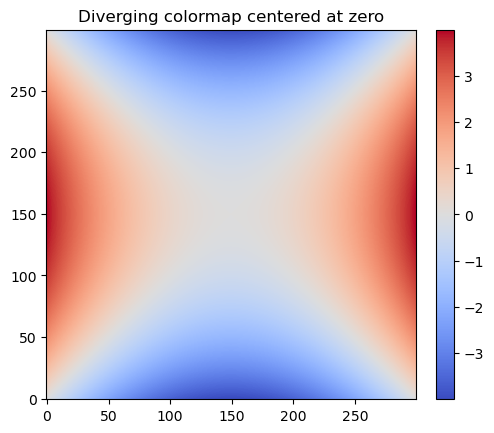

In [113]:
import matplotlib.colors as mcolors
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
XX, YY = np.meshgrid(x, y)
R = XX**2 - YY**2  # symmetric positive/negative field
norm = mcolors.TwoSlopeNorm(vmin=R.min(), vcenter=0.0, vmax=R.max())
plt.figure()
im = plt.imshow(R, origin='lower', cmap='coolwarm', norm=norm)
plt.title('Diverging colormap centered at zero')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

### Exercise 8 — Your own diverging map
Create any scalar field with both negative and positive values and visualize it using a diverging colormap, **centered at zero** using `TwoSlopeNorm`. Add a colorbar.

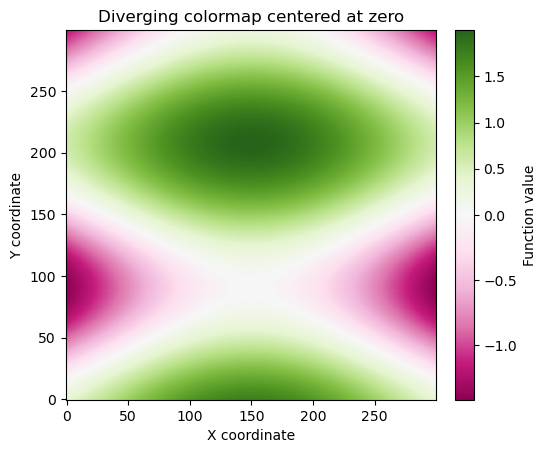

In [229]:
# TODO: create your field, set TwoSlopeNorm with vcenter=0, choose a diverging cmap, add colorbar
import matplotlib.colors as mcolors
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
XX, YY = np.meshgrid(x, y)
R = np.cos(XX) + np.sin(2*YY)
norm = mcolors.TwoSlopeNorm(vmin=R.min(), vcenter=0.0, vmax=R.max())
plt.figure()
im = plt.imshow(R, origin='lower', cmap='PiYG', norm=norm)
plt.title('Diverging colormap centered at zero')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Function value')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

## 9. Skewed data and LogNorm
When values span several orders of magnitude (skewed positive data), use logarithmic normalization (`LogNorm`).

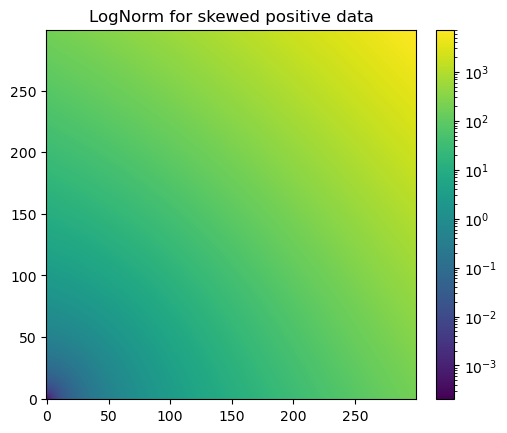

In [237]:
from matplotlib.colors import LogNorm
x = np.linspace(0.01, 3, 300)
y = np.linspace(0.01, 3, 300)
XX, YY = np.meshgrid(x, y)
Z = (XX**2 + YY**2) * np.exp(XX + YY)
plt.figure()
im = plt.imshow(Z, origin='lower', cmap='viridis', norm=LogNorm())
plt.title('LogNorm for skewed positive data')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

### Exercise 9 — Apply LogNorm
Construct a strictly positive array with a heavy tail (e.g., multiply a smooth function by `exp(…)`). Visualize it with `imshow` using `LogNorm` and add a colorbar.

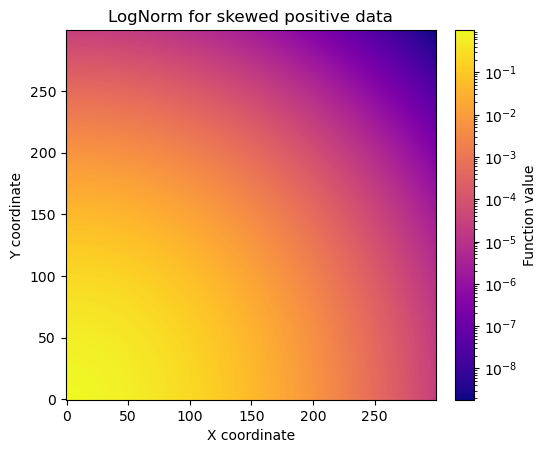

In [239]:
# TODO: build a positive, skewed field and visualize with LogNorm
R = np.exp(-(XX**2 + YY**2))*np.exp(-0.5 * np.sqrt(XX**2 + YY**2)) 
plt.figure()
im = plt.imshow(R, origin='lower', cmap='plasma', norm=LogNorm())
plt.title('LogNorm for skewed positive data')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Function value')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

## 10. Qualitative palettes for categories
For unordered categories, prefer qualitative palettes such as `'tab10'` or `'tab20'`. Differentiate categories with **both** color and encodings like markers/linestyles for accessibility.

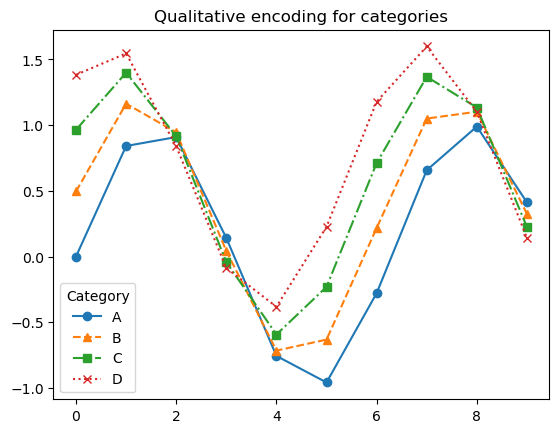

In [143]:
categories = ['A', 'B', 'C', 'D']
x = np.arange(0, 10)
data = {c: np.sin(x + i*0.3) + i*0.2 for i, c in enumerate(categories)}
plt.figure()
for i, c in enumerate(categories):
    y = data[c]
    # Use default color cycle but vary markers/linestyles for redundancy
    plt.plot(x, y, label=c, marker=['o','^','s','x'][i%4], linestyle=['-','--','-.',':'][i%4])
plt.title('Qualitative encoding for categories')
plt.legend(title='Category')
plt.show()

### Exercise 10 — Improve categorical distinguishability
Re-plot the same series using the `'tab10'` qualitative palette **explicitly** (hint: iterate colors from `matplotlib.colormaps['tab10']`). Also vary markers/linestyles. Add a legend title. Explain in a comment how redundancy helps accessibility (e.g., color‑vision deficiency).

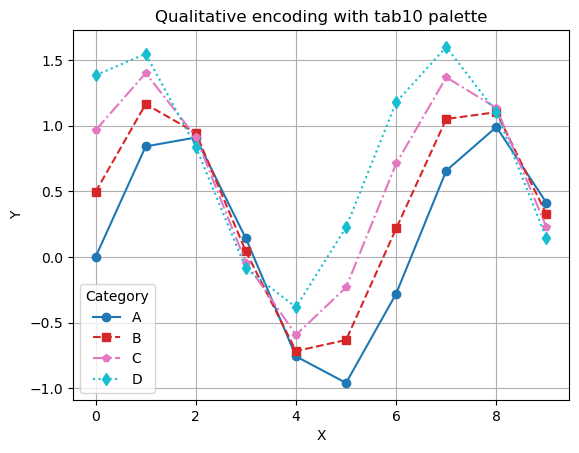

In [153]:
# TODO: use tab10 colors explicitly + redundant encodings
plt.figure()
tab10_colors = plt.colormaps['tab10'].resampled(len(categories))
markers = ['o', 's', 'p', 'd']
linestyles = ['-', '--', '-.', ':']

for i, c in enumerate(categories):
    y = data[c]
    color = tab10_colors(i)
    plt.plot(x, y, label=c, color=color, marker=markers[i], linestyle=linestyles[i])

plt.title('Qualitative encoding with tab10 palette')
plt.legend(title='Category')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Redundant visual coding is suitable:
# 1. for users with insufficient color vision,
# 2. preserves readability when displayed/printed in shades of gray, 
# 3. reduces cognitive load due to the presence of several visual channels, 
# 4. facilitates analysis with dense graphs and a large number of lines.


## 11. Contrast and visibility tips
- Ensure sufficient **lightness contrast** between lines/markers and the background.
- Use larger markers/lines for small displays or dense data.
- Avoid pure saturated colors for fine details; they can vibrate.
- Prefer legends placed near the data or use direct labeling when feasible.

### Exercise 11 — Direct labeling
Plot three smooth curves and replace the legend with **direct labels** using `plt.text` near the end of each line. Choose positions that do not overlap the lines. (You may still keep a legend if you wish, but use `plt.text`.)

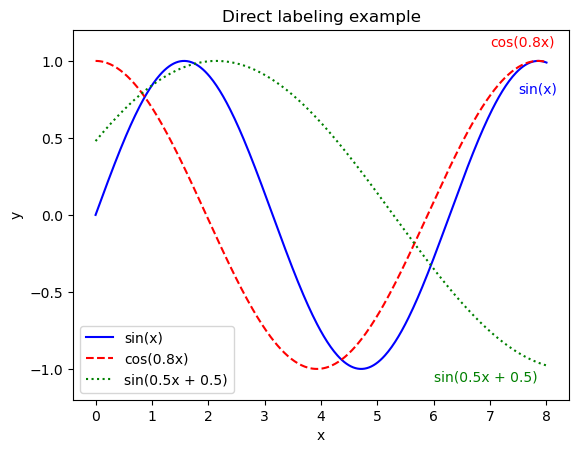

In [227]:
# TODO: draw three curves and directly label them with plt.text
x = np.linspace(0, 8, 400)
y1 = np.sin(x)
y2 = np.cos(x*0.8)
y3 = np.sin(x*0.5 + 0.5)
plt.figure()
plt.plot(x, y1, 'b-', label='sin(x)')
plt.text(x[-1] - 0.5, y1[-1] - 0.2, 'sin(x)', color='blue')
plt.plot(x, y2, 'r--', label='cos(0.8x)')
plt.text(x[-1] - 1.0, y2[-1] + 0.1, 'cos(0.8x)', color='red')
plt.plot(x, y3, 'g:', label='sin(0.5x + 0.5)')
plt.text(x[-1] - 2.0, y3[-1]-0.1, 'sin(0.5x + 0.5)', color='green')
plt.ylim([-1.2, 1.2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Direct labeling example')
plt.legend(loc='lower left')
plt.show()